In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SMSSpamCollection', sep= '\t',names= ['Label','Text'])

In [3]:
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
!pip install nltk

In [6]:
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [8]:
sent = 'Hello Friends! How are you?'

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'Friends', '!', 'How', 'are', 'you', '?']

In [10]:
from nltk.corpus import stopwords
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
clean = [word for word in word_tokenize(sent) if word not in swords]
clean

['Hello', 'Friends', '!', 'How', '?']

In [12]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]
clean

['hello', 'friend', '!', 'how', '?']

In [13]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens
             if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean
             if word not in swords]
    return clean

In [14]:
sent = 'Hello Friends! How are you? We will learn Python Today!'

In [15]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [18]:
x = df['Text']
y = df['Label']

In [19]:
x_new = tfidf.fit_transform(x)

In [20]:
x.shape

(5572,)

In [21]:
x_new.shape

(5572, 6513)

In [22]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyada', 'é', 'ü'], dtype=object)

In [23]:
y.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb = GaussianNB()

In [28]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [29]:
y_pred = nb.predict(x_test.toarray())

In [30]:
y_test.value_counts()

ham     1208
spam     185
Name: Label, dtype: int64

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

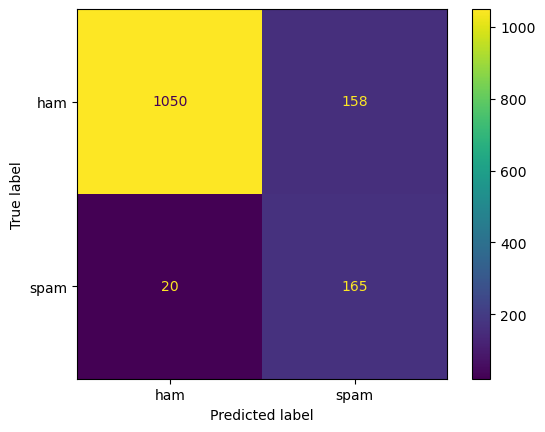

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [34]:
accuracy_score(y_test, y_pred)

0.8722182340272793

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=0)

In [37]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_pred = rf.predict(x_test)

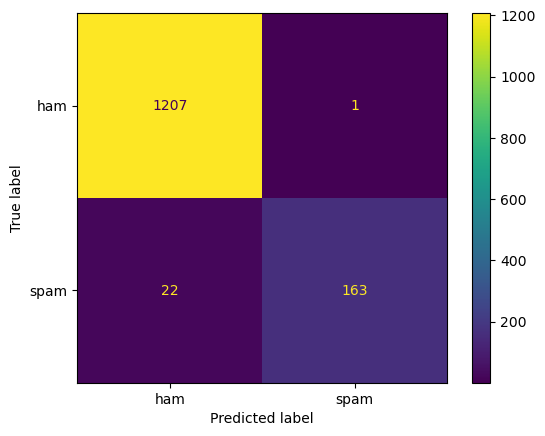

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [40]:
accuracy_score(y_test, y_pred)

0.9834888729361091

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)

0.9641062455132807

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    'criterion': ['gini','entropy'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0,1,2,3,4],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [45]:
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')

In [46]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [47]:
rf = grid.best_estimator_
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9791816223977028